# **Project Name:-**  Spam Email Detection-ML

##### **Project Type**    - classification
##### **Contribution**    - Individual
##### **Auther -** Prashik Dhole

# ***Let's Begin !***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix,classification_report

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
message = pd.read_csv('/content/drive/MyDrive/Spam Email Detection - spam.csv',encoding='latin-1')[['v1','v2']]

### Dataset First View

In [5]:
message.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
message.tail(10)

,v1,v2
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


### Dataset Rows & Columns count

In [7]:
message.shape

(5572, 2)

### Dataset Information

In [8]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
message.describe()

,v1,v2
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Missing Values/Null Values

In [10]:
message.isnull().sum()

v1    0
v2    0
dtype: int64

In [13]:
message.columns = ['label','message']

### 2.Exploring the target variable

In [14]:
message['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [15]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    647  Please call our customer service representativ...    4

In [16]:
message['length'] = message['message'].apply(len)

In [17]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

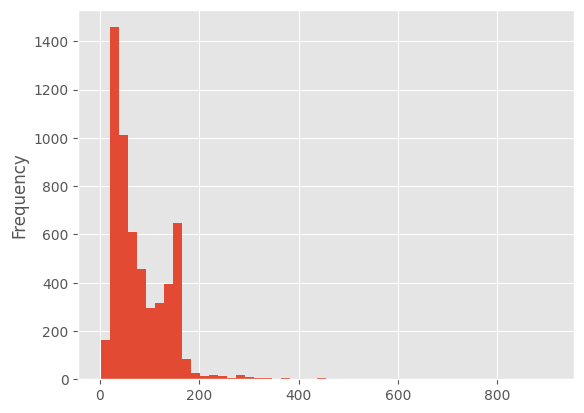

In [18]:
message['length'].plot(bins=50,kind='hist')

**from this plot we seen the maximum length of character is 0 to 200**

In [19]:
message.length.describe()

count    5572.000000
mean       80.337940
std        59.790057
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
message[message['length']==120]['message'].iloc[0]

'SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV'

### 3.Text Pre-Processing

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
import string
from nltk.corpus import stopwords


In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [25]:
def text_process(msg):
  nopunc = [char for char in msg if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [26]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
pd.set_option('display.max_colwidth',-1)

<ipython-input-27-dc5dda32fe3d>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


In [28]:
message['tokenized_message'] = message['message'].apply(text_process)

In [29]:
message.head(10)

,label,message,length,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,Nah dont think goes usf lives around though
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, ï¿½1.50 to rcv",149,FreeMsg Hey darling 3 weeks word back Id like fun still Tb ok XxX std chgs send ï¿½150 rcv
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77,Even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,160,per request Melle Melle Oru Minnaminunginte Nurungu Vettam set callertune Callers Press 9 copy friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea ï¿½900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,159,WINNER valued network customer selected receivea ï¿½900 prize reward claim call 09061701461 Claim code KL341 Valid 12 hours
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,154,mobile 11 months U R entitled Update latest colour mobiles camera Free Call Mobile Update Co FREE 08002986030


### Vectorization

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorizer = CountVectorizer(max_df=0.9,min_df=10)
x = vectorizer.fit_transform(message['tokenized_message'])


In [32]:
x.toarray()[4560]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [34]:
vectorizer.get_feature_names_out()

array(['0800', '08000839402', '08000930705', '10', '100', '10p', '12',
       '12hrs', '150', '150p', '150pmsg', '150ppm', '16', '18', '1st',
       '2003', '2nd', '500', '750', '800', '8007', '86688', '87066',
       'abiola', 'able', 'abt', 'account', 'across', 'actually',
       'address', 'admirer', 'aft', 'afternoon', 'age', 'ago', 'ah',
       'aight', 'almost', 'alone', 'already', 'alright', 'also', 'always',
       'amp', 'angry', 'another', 'ans', 'answer', 'anyone', 'anything',
       'anytime', 'anyway', 'apply', 'ard', 'area', 'around', 'asap',
       'ask', 'askd', 'asked', 'asking', 'ass', 'attempt', 'auction',
       'available', 'await', 'award', 'awarded', 'away', 'awesome', 'b4',
       'babe', 'baby', 'back', 'bad', 'bank', 'bath', 'bathe', 'bcoz',
       'bday', 'beautiful', 'bed', 'believe', 'best', 'better', 'big',
       'birthday', 'bit', 'bonus', 'book', 'booked', 'bored', 'bout',
       'box', 'boy', 'boytoy', 'break', 'bring', 'brother', 'bslvyl',
       'bt'

In [35]:
x.toarray().shape

(5572, 874)

###Check the Observations

In [36]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [37]:
message.iloc[4065]['tokenized_message']

'Fyi Im gonna call sporadically starting like ltgt bc doin shit'

###Split the Data

In [38]:
msg_train,msg_test,label_train,label_test = train_test_split(message['tokenized_message'],message['label'],test_size=0.2)

In [39]:
msg_train.head(10)

907     Ill give Plus said grinule greet whenever speak                                                                      
2603    Im arestaurant eating squid 1030 wanna dosomething late                                                              
2479    Sppok ur mob Halloween collection nokia logopic message plus FREE eerie tone txt CARD SPOOK 8007                     
4567    hiya hows going sunny africa hope u r avin good time give big old silver back big kiss                               
653     Fine miss much                                                                                                       
999     Aight thanks comin                                                                                                   
661     mums repent                                                                                                          
3508    Hi Peteynoiï¿½ï¿½m ok wanted 2 chat coz avent spoken 2 u 4 long timehope ur doin alritehave good nit js love y

###Apply Vectorizer

In [40]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [41]:
train_array = train_vectorized.toarray()
test_array = test_vectorized.toarray()

###Fit the data in model

In [42]:
spam_detect_model = GaussianNB().fit(train_array,label_train)

In [43]:
train_pred = spam_detect_model.predict(train_array)
test_pred = spam_detect_model.predict(test_array)

In [44]:
test_pred

array(['ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam',
       'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam

###Evalute The Model

In [45]:
confusion_matrix(label_train,train_pred)

array([[2936,  938],
       [   0,  583]])

In [46]:
confusion_matrix(label_test,test_pred)

array([[709, 242],
       [ 14, 150]])

In [47]:
classification_report(label_train,train_pred)

'              precision    recall  f1-score   support\n\n         ham       1.00      0.76      0.86      3874\n        spam       0.38      1.00      0.55       583\n\n    accuracy                           0.79      4457\n   macro avg       0.69      0.88      0.71      4457\nweighted avg       0.92      0.79      0.82      4457\n'

In [48]:
classification_report(label_test,test_pred)

'              precision    recall  f1-score   support\n\n         ham       0.98      0.75      0.85       951\n        spam       0.38      0.91      0.54       164\n\n    accuracy                           0.77      1115\n   macro avg       0.68      0.83      0.69      1115\nweighted avg       0.89      0.77      0.80      1115\n'